In [119]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

In [ ]:
#let's open a file to write in all the data

f= open("Air_data.txt","w")
f.write("Volume 1_omega_0 o_error beta b_error 2_omega_0 o_error beta b_error 3_omega_0 o_error beta b_error 4_omega_0 o_error beta b_error 5_omega_0 o_error beta b_error 6_omega_0 o_error beta b_error\n")
f.close()

In [120]:
# code imports all data from a gas file and assigns a specific variable name to each data set.
# eg. 100-a.csv, is split into 2 variables: 'hundred_a_time' and 'hundred_a_voltage'


# for the n-th row: data_array[n]
# for the n-th row, ml column (2nd column, with indexing starting at 0): data_array[n][2]

data_array = np.ones((3,60))
numb_1 = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
numb_2 = ["ten", "twenty", "thirty", "fourty", "fifty", "sixty", "seventy", "eighty", "ninety", "hundred"]
alph = ["a", "b", "c", "d", "e", "f"]
letter_list = 10 * alph
ml_list = []
for i in range (10, 110, 10):
    ml_col = [i for n in range(6)]
    ml_list += ml_col
list1 = 60 * [1]
data_array = np.column_stack((list1, ml_list, letter_list))

# for loop to create the list of data names with each ml and letter, eg '30ml-b.csv' 
for n in range(60):
    ml = data_array[n][1]
    letter = data_array[n][2]
    data_array[n][0] = F"{ml}ml-{letter}.csv"
    

# we find which row the data_name is in from our data_array, then we make the ml and letter variables, then we do ml.letter.time and ml.letter.voltage so we can plot the variables

def read_data(data_name):
    for n in range(60):
        if data_array[n][0] == data_name:
            letter = data_array[n][2]
            for m in range(10):
                if numb_1[m] == data_array[n][1]:
                    ml = numb_2[m]
                    break

            
    data = pd.read_csv(data_name, skiprows = 2, names = ['time', 'voltage'])
    globals()[f"{ml}_{letter}_time"] = data['time'].values.tolist()
    globals()[f"{ml}_{letter}_voltage"] = data['voltage'].values.tolist()

for n in range(60):
    #print(data_array[n][0])
    data_name = str(data_array[n][0])
    read_data(data_name)
    
#print('fifty_e_time', fifty_e_time)
#print('')
#print('eighty_d_voltage', eighty_d_voltage)


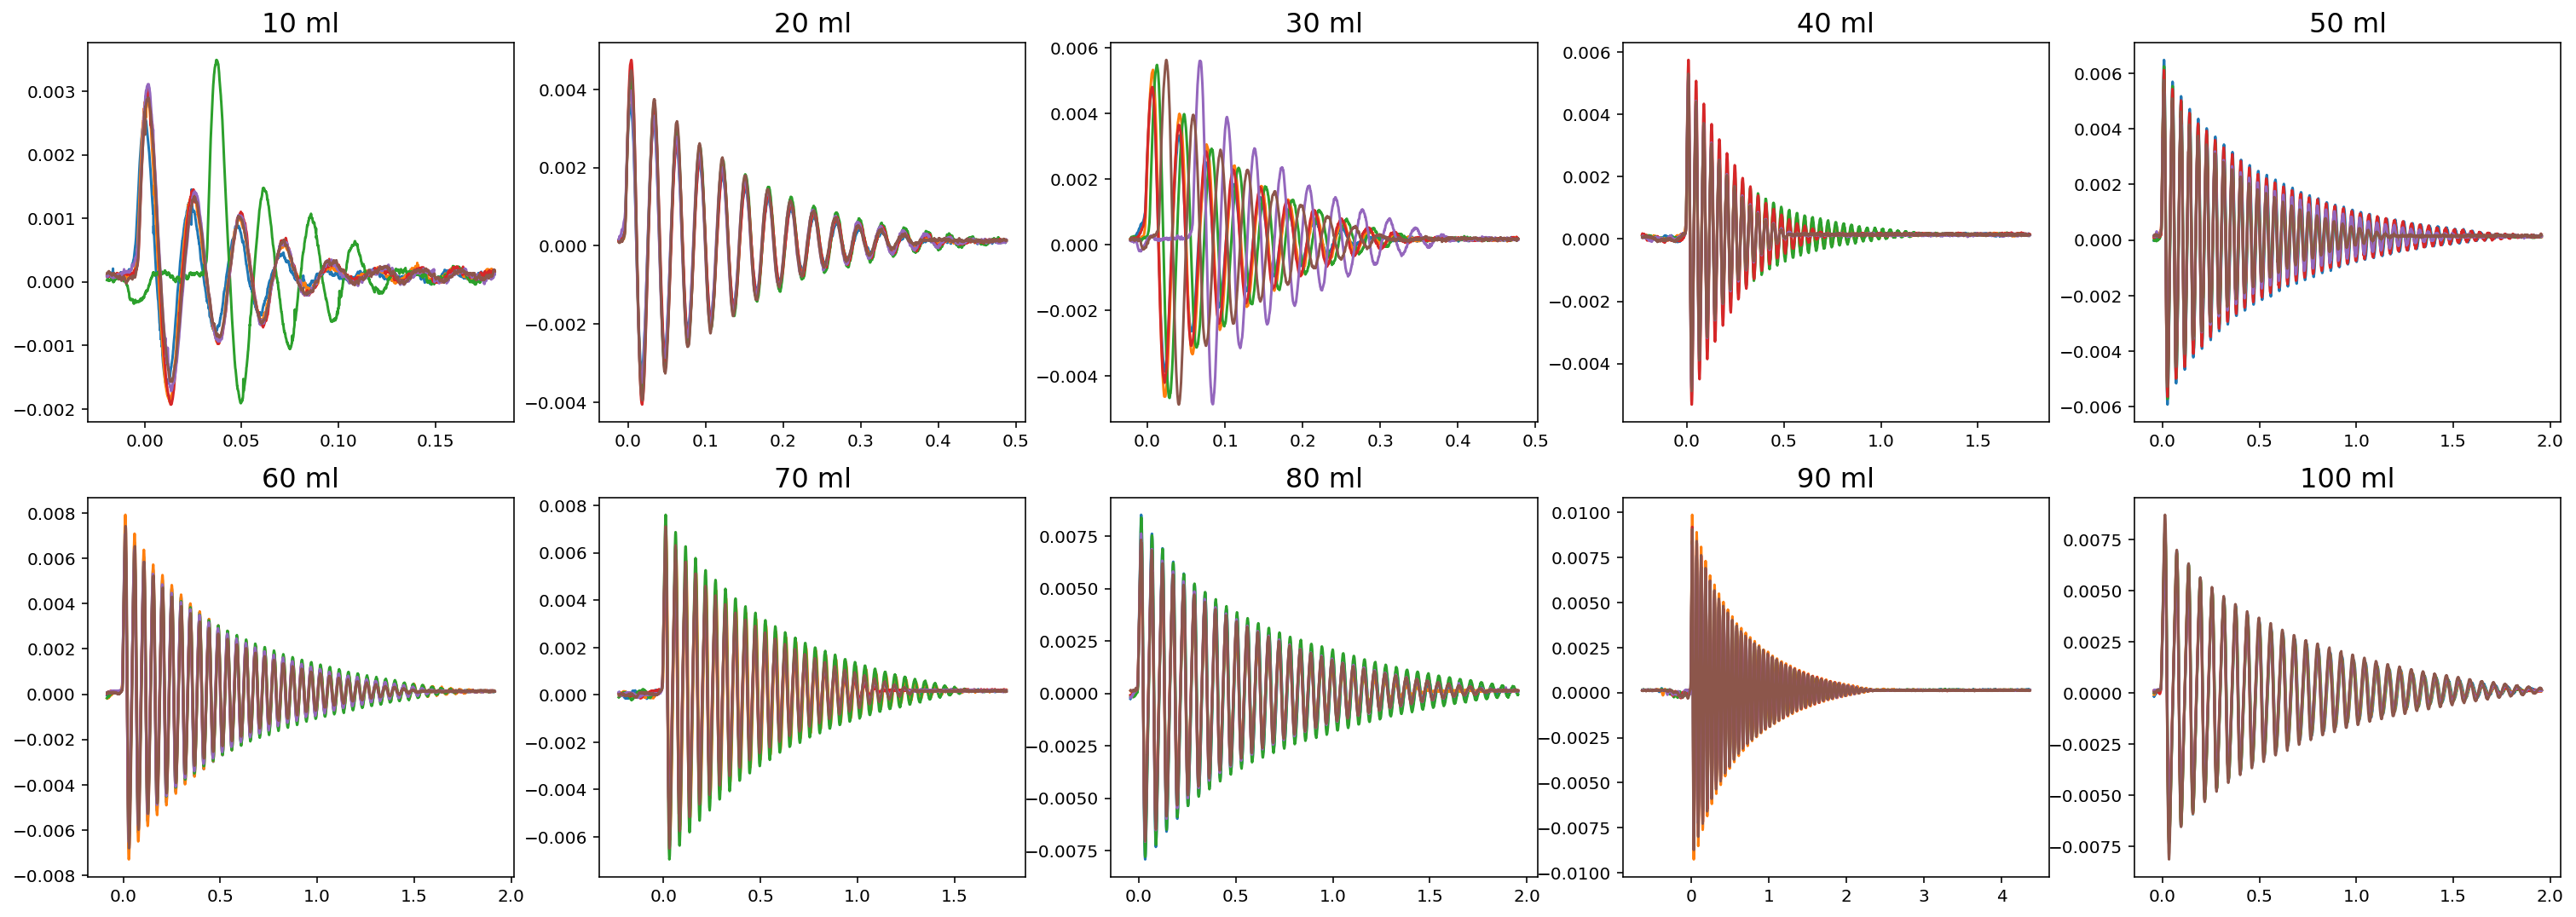

In [134]:
#plot all data on a 2 by 5 subplotlot just for a quick comparison
#different volumes aare plotted on a separate subplot with the 6 repeats on top. 

fig = plt.figure(figsize=(26, 9))
for k in range (1, 11):
    globals()[f"ax{k}"] = fig.add_subplot(2,5,k)

    
k = 1
while k < 11:
    for j in numb_2:
        for i in alph:
            time = globals()[f"{j}_{i}_time"]   #globals()[f"my_variable{i}"] = f"Hello from variable number {i}!"
            voltage = globals()[f"{j}_{i}_voltage"]
            globals()[f"ax{k}"].plot(time, voltage)
            globals()[f"ax{k}"].set_title(f"{numb_1[k-1]} ml", fontsize = 16)
        k += 1

plt.savefig("Air_all_data.png")    
    

# Volume specific analysis:


Text(0, 0.5, 'EMF / V')

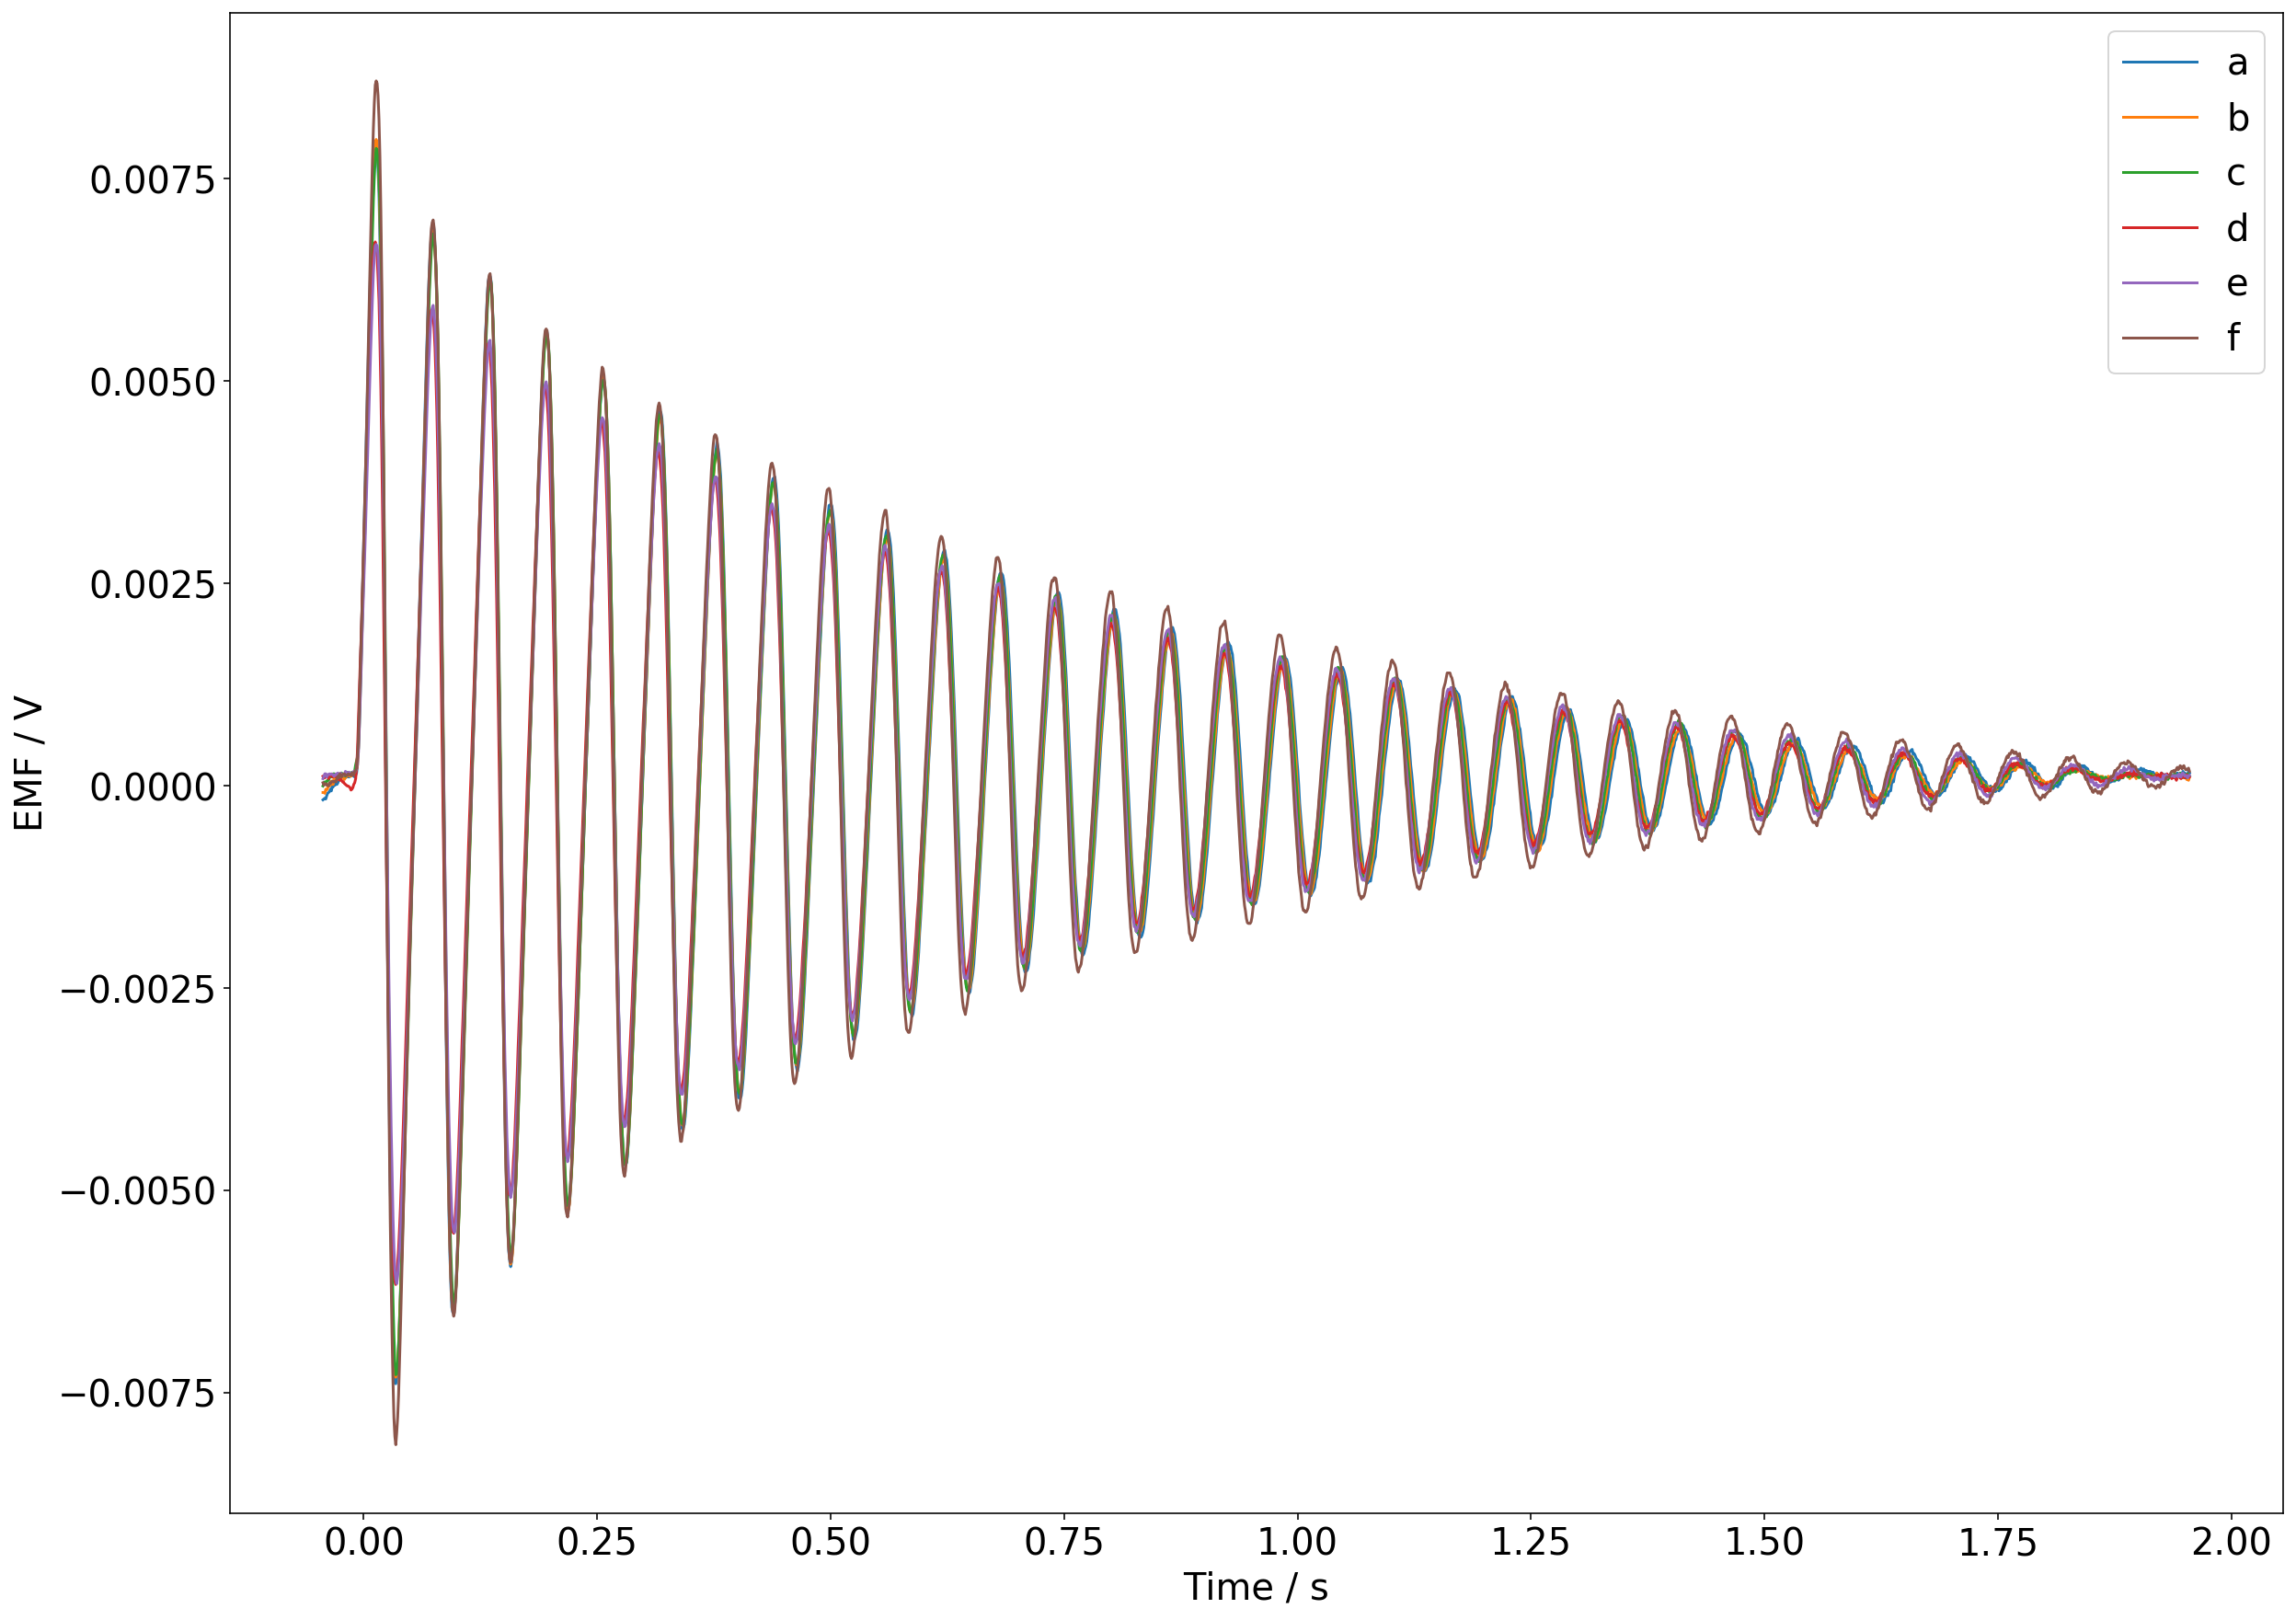

In [108]:
#let's zoom into each plot individuallly
#indexs  = [ 0,     1,         2,       3,       4,        5,        6,         7,        8,        9     ]
#numb_2 = ["ten", "twenty", "thirty", "fourty", "fifty", "sixty", "seventy", "eighty", "ninety", "hundred"]
vol_list = [16.3, 26.3, 36.3, 46.3, 56.3, 66.3, 76.3, 86.3, 96.3, 106.3]
fig = plt.figure(figsize=(20, 15))
V = numb_2[9]                #TO CHANGE THE VOLUME BEING MEASURED JUST CHANGE INDEX LOOKING AT ABOVE LIST
vol = vol_list[9]
j = 0
while j < 6:
    for i in alph:
        time = globals()[f"{V}_{i}_time"]         
        voltage = globals()[f"{V}_{i}_voltage"]
        plt.plot(time, voltage, label = alph[j])
        j += 1
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time / s", size = 20)
plt.ylabel("EMF / V", size = 20)


In [109]:
#now time to repeat analysis pipeline from preliminary data
#start with cleaning the data 
cut_off_point = float(input("Looking at the graph above suggest a cut off point where the graph becomes noisy: "))
print(cut_off_point)

Looking at the graph above suggest a cut off point where the graph becomes noisy: 1.7
1.7


In [110]:
# let's check the length of each repeat to check if the code in the next secion works
for letter in alph:
    print(len(globals()[f"{V}_{letter}_time"]))
    

2000
2000
2000
2000
2000
2000


In [111]:
#clean each data for the 6 repeats at once

for letter in alph:
    globals()[f"time_{letter}_clean"] = []         #new clean time
    globals()[f"voltage_{letter}_clean"] = []      #new clean voltage
    for index in range(0, len(globals()[f"{V}_{letter}_time"])):
        if globals()[f"{V}_{letter}_time"][index] >= 0 and globals()[f"{V}_{letter}_time"][index] <= cut_off_point:
            globals()[f"time_{letter}_clean"].append(globals()[f"{V}_{letter}_time"][index])
            globals()[f"voltage_{letter}_clean"].append(globals()[f"{V}_{letter}_voltage"][index])
    print("Original length = " ,len(globals()[f"{V}_{letter}_time"]))
    print("New_length =      " ,len(globals()[f"time_{letter}_clean"]))
    
    
# variable names for the clean lists are, time_a_clean, voltage_a_clean

Original length =  2000
New_length =       1700
Original length =  2000
New_length =       1700
Original length =  2000
New_length =       1700
Original length =  2000
New_length =       1700
Original length =  2000
New_length =       1700
Original length =  2000
New_length =       1700


Text(0, 0.5, 'EMF / V')

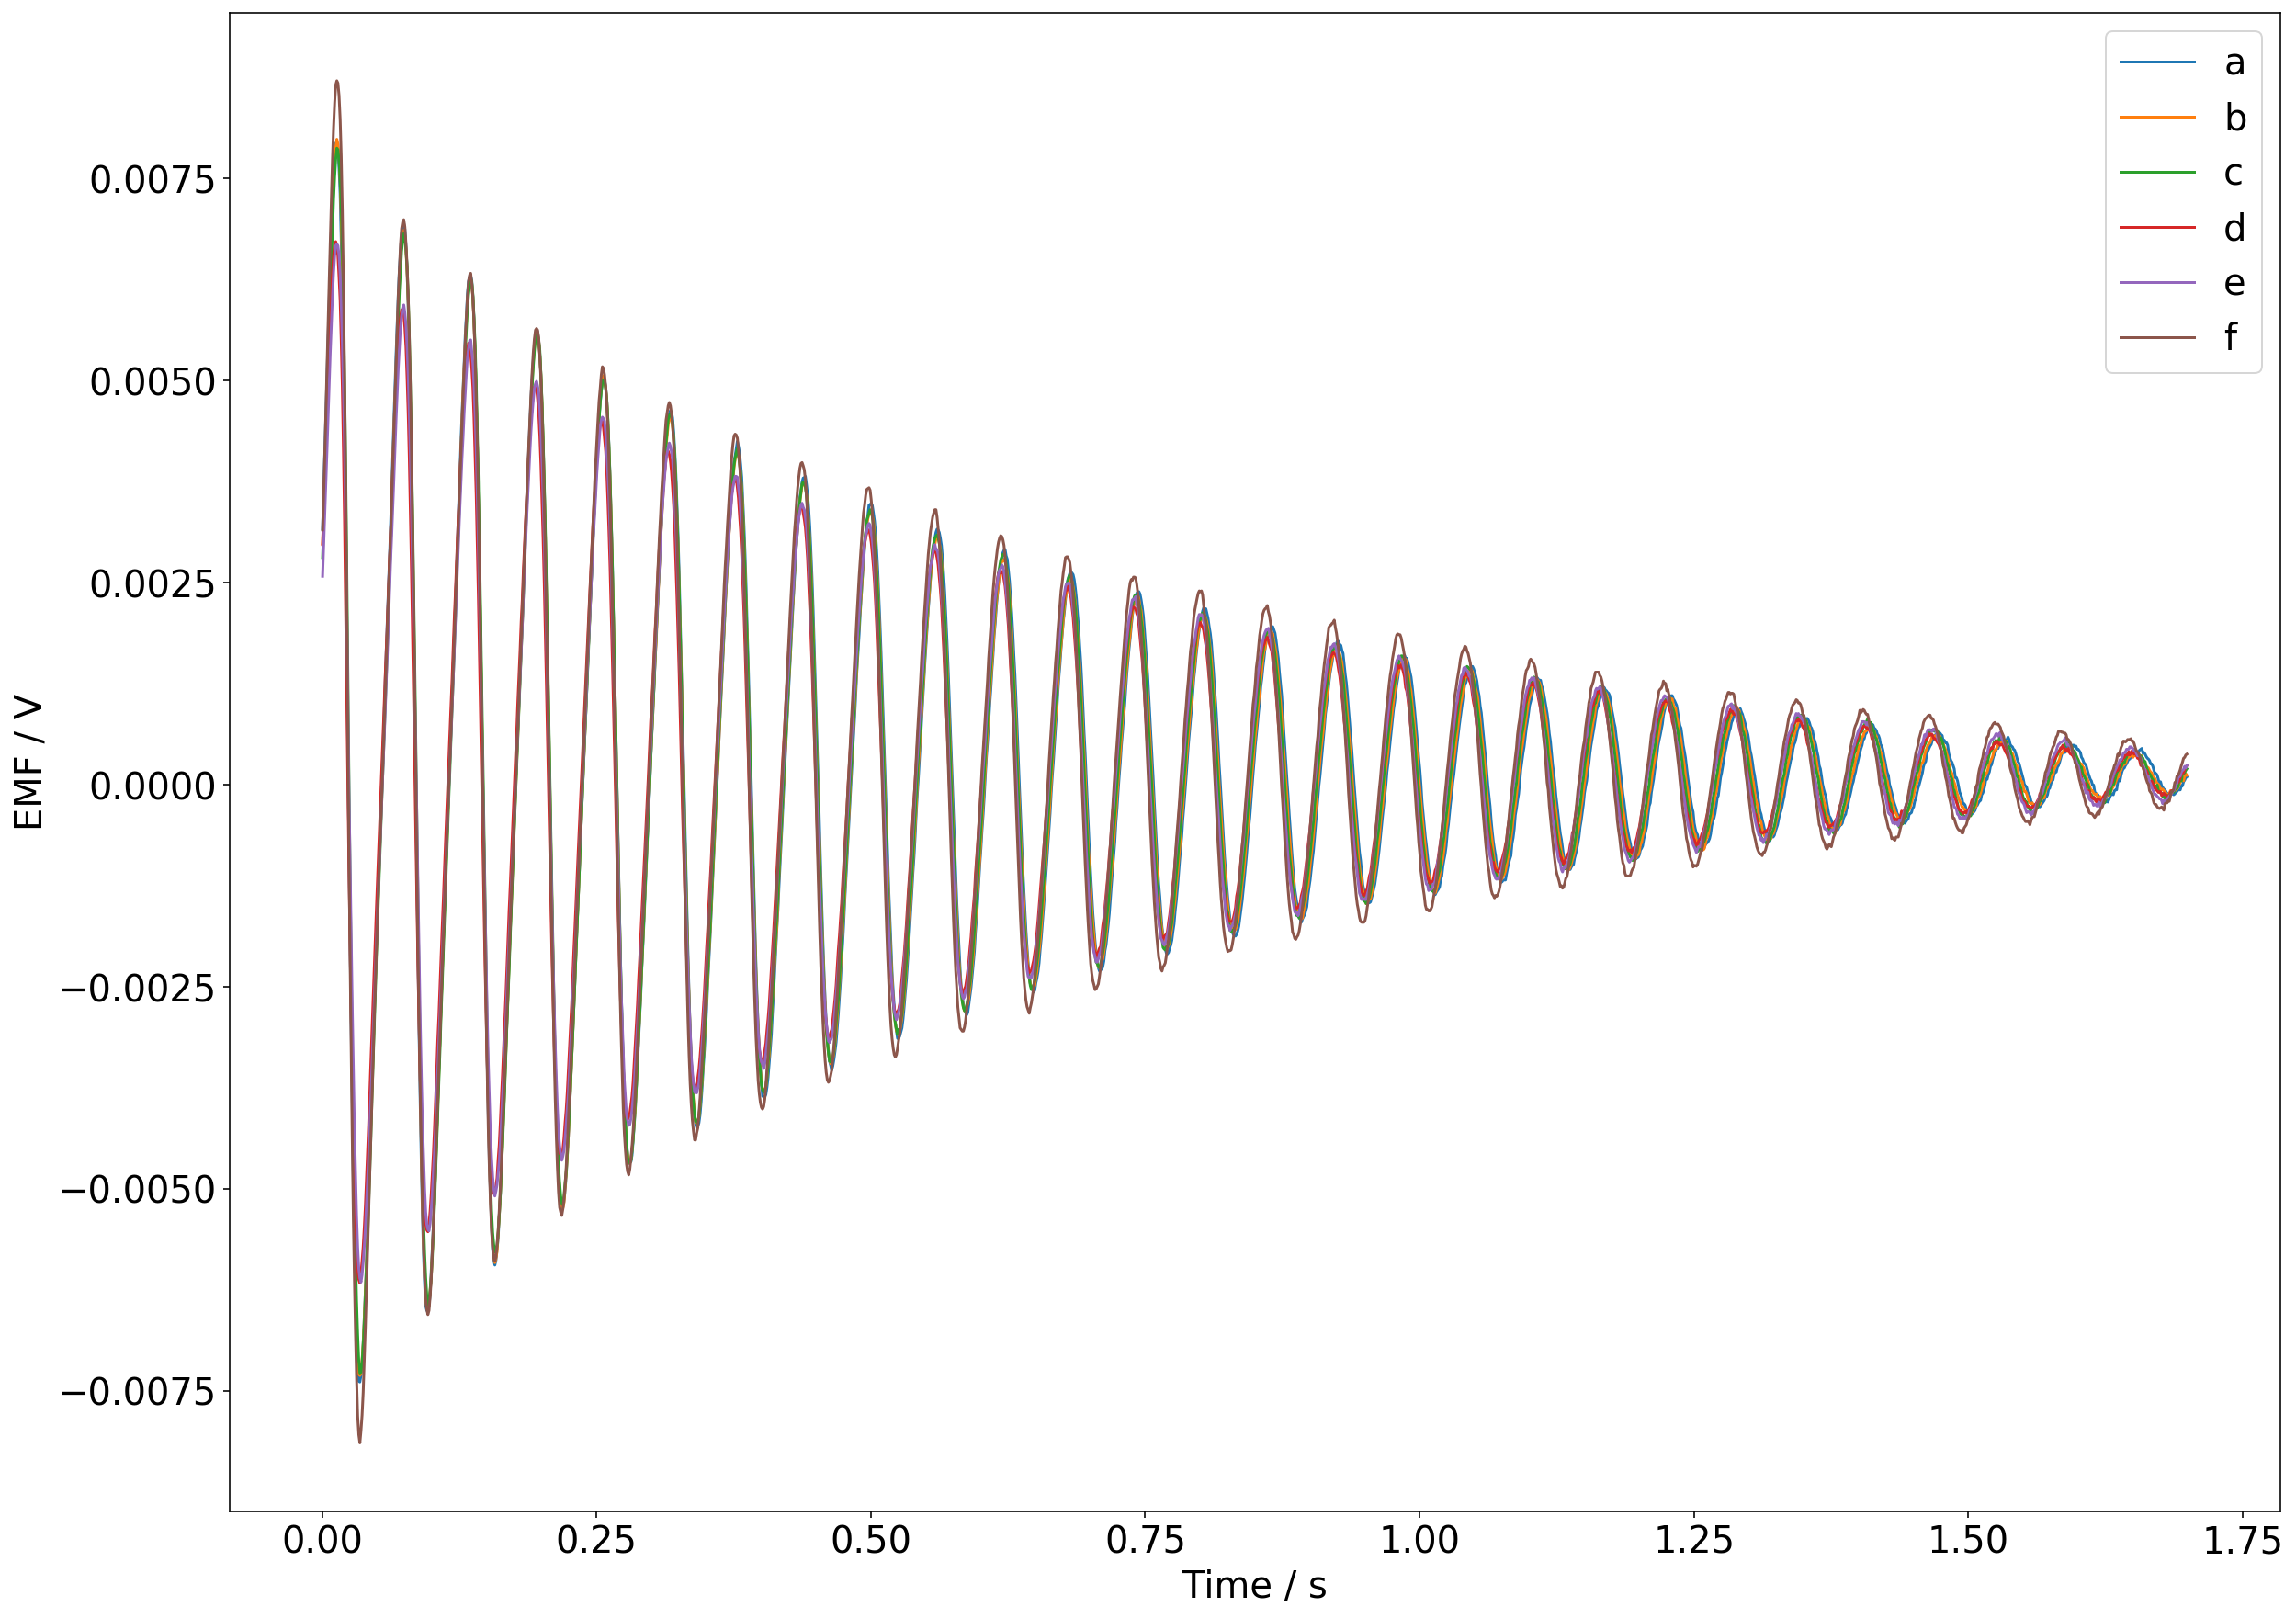

In [112]:
#plot the clean version ofthe plots
#indexs  = [ 0,     1,         2,       3,       4,        5,        6,         7,        8,        9     ]
#numb_2 = ["ten", "twenty", "thirty", "fourty", "fifty", "sixty", "seventy", "eighty", "ninety", "hundred"]
fig = plt.figure(figsize=(20, 15))

for letter in alph:
    time = globals()[f"time_{letter}_clean"]         
    voltage = globals()[f"voltage_{letter}_clean"]
    plt.plot(time, voltage, label = letter)

plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time / s", size = 20)
plt.ylabel("EMF / V", size = 20)

### remember to change parameters according to gas

In [117]:
#now we can Finally start with the fit!!
#define variables 
#Defining constant variables:

P_0 = 101400                    # Atmospheric Pressure in Pa
g = 9.81                        # gravitational constant
m = 106.3e-3                     # mass of plunger + magnet in kg   
d = 34.16e-3                    #diameter in m
a = np.pi * (d/2)**2            #cross-sectional area in m^2
P = P_0 + ((m*g)/a)             #Pressure of gas
constant = m/(P*a**2)
print(constant)
print(P)

1.2342352317830572
102537.82813020048


In [114]:
#error_analysis

m_err = 0.01e-3                 # error in mass
P_0_err = 100
d_err = 0.01e-3
a_err = (np.pi/4) * (2 * d_err)
p_err = np.sqrt(((m*g*a_err)/a**2)**2 + (P_0_err)**2)

const_err = (m/a**2) * (1/P**2) * p_err  #ignoring area error since it is negligilble compared to pressure error
print(const_err)

print(f"constant = {constant} +/- {const_err}")

0.0012335707445499922
constant = 1.2378568909703336 +/- 0.0012335707445499922


A = 0.035209352498495335 +/- 0.00026966381038402406
b = 0.35252337465267414 +/- 0.004005665196216812
omega_star = -103.10489688965538 +/- 0.019146568096097463
phi = 2.542327764871039 +/- 0.007901954402819596


[]

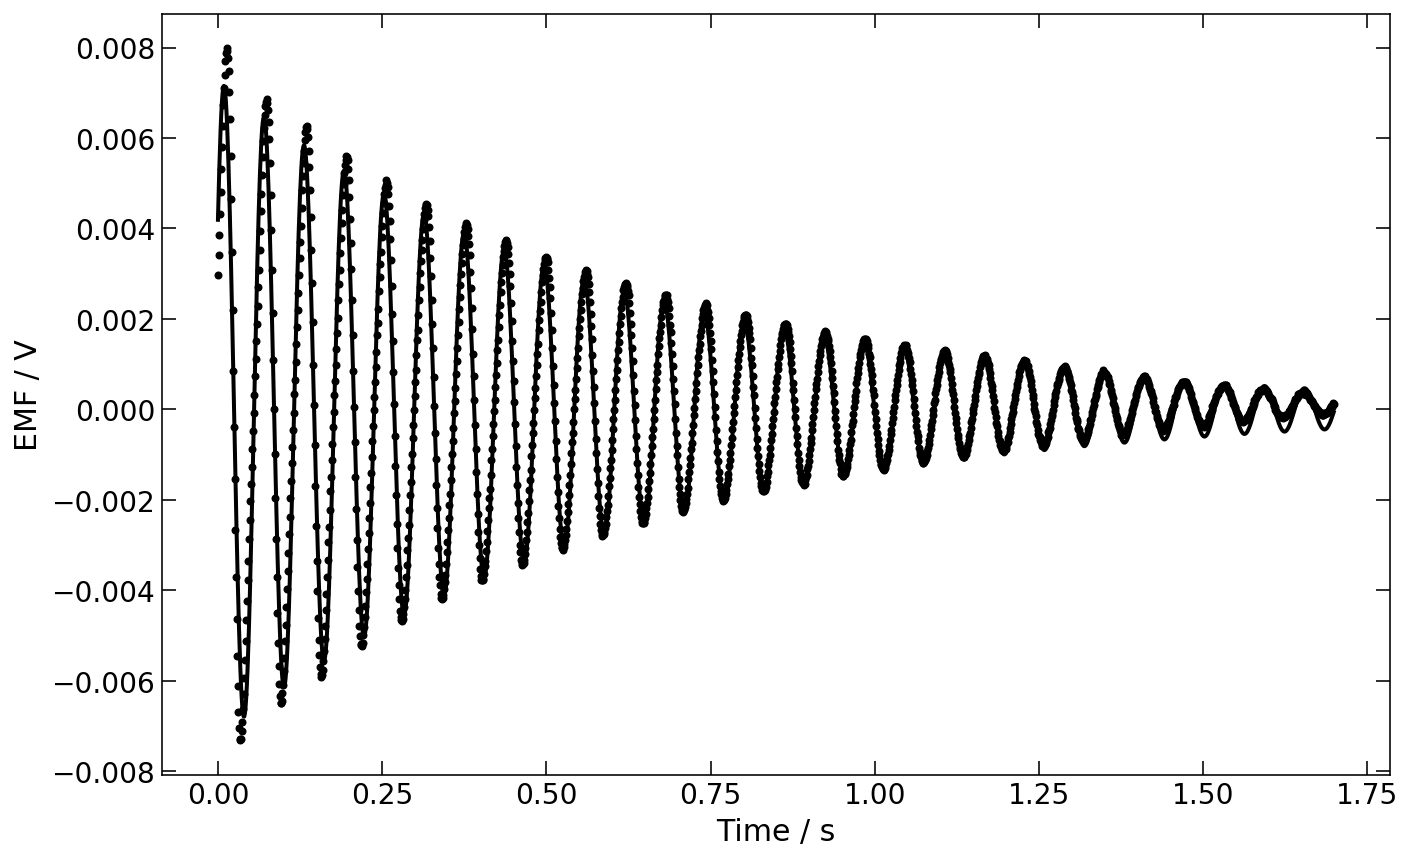

In [115]:
#this is the code for the fit, first just try with the first repeat then modify so that all 6 repeats are fitted at once
# a normal exp*cos fit is used for now since for some reason the derived equation fit isn't fitting well. 


emf_constant = 0.002 #from izzy's EMF analysis

#open a file to write the results into

def fit(time, A, b, omega_star, phi):
    beta = b/(2*m)    
    exp_term = -A*np.exp(-beta*time)
    sin = omega_star * np.sin(time*omega_star + phi)
    cos = beta* np.cos(omega_star*time + phi)

    return emf_constant * exp_term*(sin + cos)

time = np.arange(0, cut_off_point, 0.001)

#def fit(time, A, b, omega_star, phi):
 #   beta = b/(2*m)    
  #  exp_term = A*np.exp(-beta*time)
   # cos = np.cos(omega_star*time + phi)

    #return exp_term*(cos)


    
popt, pcov = curve_fit(fit, time_b_clean, voltage_b_clean)
print("A =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)
print("omega_star =", popt[2], "+/-", pcov[2,2]**0.5)
print("phi =", popt[3], "+/-", pcov[3,3]**0.5)

A = popt[0]
b = popt[1]
omega_star = popt[2]
phi = popt[3]
omega_star_err = pcov[2,2]**0.5

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)
plt.plot(time, fit(time, A, b, omega_star, phi), color = "black", linewidth = 2)
plt.plot(time_b_clean, voltage_b_clean, marker = 'o', color = 'black', ls = 'none', markersize = 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time / s", size = 15)
plt.ylabel("EMF / V", size = 15)
plt.tick_params(direction='in',      # I like 'in', could be 'out' or both 'inout'
                length=7,            # A reasonable length
                bottom='on',         # I want ticks on the bottom axes
                left='on',
                top='on',
                right='on')
plt.plot()

In [116]:
#code which iterates accross all variables 

#open the file to write data into
f = open("Air_data.txt", "a")
f.write("\n")
f.write(str(vol))

time = np.arange(0, cut_off_point, 0.0001)


for letter in alph:
    
    popt, pcov = curve_fit(fit, globals()[f"time_{letter}_clean"], globals()[f"voltage_{letter}_clean"])
    A = popt[0]
    A_err = pcov[0,0]**0.5
    b = popt[1]
    b_err = pcov[1,1]**0.5
    omega_star = popt[2]
    omega_star_err = pcov[2,2]**0.5
    phi = popt[3]
    phi_err = pcov[3,3]**0.5
    
    
    print(letter)
    print('')
    print("A =", popt[0], "+/-", pcov[0,0]**0.5)
    print("b =", popt[1], "+/-", pcov[1,1]**0.5)
    print("phi =", popt[3], "+/-", pcov[3,3]**0.5)
    print("OMEGA_STAR =", popt[2], "+/-", pcov[2,2]**0.5)
    
    def beta():
        return b/(2*m)
    def beta_err():
        frac_err = 0.5 * np.sqrt(((pcov[1,1]**0.5)/(popt[1]))**2 + (m_err/m)**2)
        return frac_err * beta()
    print(f"beta = {beta()} +/- {beta_err()}")
    def omega_0():
        return np.sqrt(omega_star**2 + beta()**2)
    def omega_0_err():
        return ((pcov[2,2]**0.5)/popt[2]) * omega_0()
    print(f"OMEGA_0 = {omega_0()} +/- {omega_0_err()}")
    print('')
    
    f.write(f" {omega_0()} {omega_0_err()} {beta()} {beta_err()}")
    
f.close()

a

A = 0.03543551620657561 +/- 0.0002702961222614168
b = 0.3473898087033356 +/- 0.00394041227977617
phi = 2.5019588434572486 +/- 0.007876465420628372
OMEGA_STAR = -102.92583178245206 +/- 0.018855840180167803
beta = 1.634006626074015 +/- 0.009267515981011313
OMEGA_0 = 102.93880136160355 +/- -0.01885821618536931

b

A = 0.035209352498495335 +/- 0.00026966381038402406
b = 0.35252337465267414 +/- 0.004005665196216812
phi = 2.542327764871039 +/- 0.007901954402819596
OMEGA_STAR = -103.10489688965538 +/- 0.019146568096097463
beta = 1.6581532203794644 +/- 0.00942098417930685
OMEGA_0 = 103.11822940066767 +/- -0.01914904394193689

c

A = 0.03472465080900027 +/- 0.00026650798340268955
b = 0.3464890339066344 +/- 0.0039557978651625575
phi = 2.5952404868536014 +/- 0.007900867152894894
OMEGA_STAR = -103.29060446899418 +/- 0.018873782544309225
beta = 1.6297696797113563 +/- 0.00930369744669765
OMEGA_0 = 103.30346132041804 +/- -0.01887613181333738

d

A = -0.03042274006659489 +/- 0.00021520679469173173


Extract data here:
100 ml 



90ml



could modify the code by putting the whole cleaning process in a giant outer loop which loops across the volumes and then stores the cut off points and then the cleaned data as their own global dynamic variables. Once this is done the data for emega naught and beta could be read into a file. 